In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = "complex_traits_matched_9"
V = pd.read_parquet(f"../../results/dataset/{dataset}/test.parquet").query("label")
V.trait = V.trait.str.split(",")
V

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group
8,1,2293397,G,A,0.999932,[Height],True,0.370570,32.3020,dELS,65077,dELS_0
17,1,3080038,T,C,0.999895,"[MCH, MCV, Plt, RBC]",True,0.232720,31.6060,dELS,10826,dELS_1
26,1,3774964,A,G,0.999973,"[Hb, HbA1c, MCHC, RBC]",True,0.230570,95.3170,dELS,2138,dELS_2
60,1,9181780,G,A,1.000000,"[AST, Mono]",True,0.074322,35.4720,non_coding_transcript_exon_variant,52677,non_coding_transcript_exon_variant_0
61,1,9295877,G,T,0.993319,[DVT],True,0.265060,46.3070,dELS,1348,dELS_3
...,...,...,...,...,...,...,...,...,...,...,...,...
11354,22,45969257,G,A,0.999905,[eBMD],True,0.002641,9.5349,dELS,3457,dELS_207
11355,22,45979731,C,T,0.980260,[eBMD],True,0.167140,37.7760,dELS,2568,dELS_208
11359,22,46219479,G,A,0.945802,[BW],True,0.128710,164.8500,dELS_flank,28805,dELS_flank_108
11372,22,47990921,C,T,0.997536,[BMI],True,0.437610,53.5140,intron_variant,498631,intron_variant_124


In [3]:
disease_traits = [
    "AFib",
    "AID_Combined",
    "Alzheimer_LTFH",
    "Asthma",
    "Blood_Clot_Lung",
    "BrC",
    "CAD",
    "CRC",
    "Cholelithiasis",
    "Depression_GP",
    "DVT",
    "Fibroblastic_Disorders",
    "Glaucoma_Combined",
    "Hypothyroidism",
    "IBD",
    "Inguinal_Hernia",
    "Insomnia",
    #"LOY",
    "Migraine_Self",
    "PrC",
    "T2D",
    "T2D_BMI",
]

In [4]:
complex_trait_renaming = pd.read_csv(
    "../../results/gwas/raw/release1.1/UKBB_94traits_release1.traits", sep="\t",
    usecols=["trait", "description"]
).set_index("trait")["description"].to_dict()
complex_trait_renaming

{'AFib': 'Atrial fibrillation',
 'AG': 'Albumin/Globulin ratio',
 'Age_at_Menarche': 'Age at menarche',
 'Age_at_Menopause': 'Age at menopause',
 'AID_Combined': 'Autoimmune disease (Phecode + Self-reported)',
 'Alb': 'Albumin',
 'ALP': 'Alkaline phosphatase',
 'ALT': 'Alanine aminotransferase',
 'Alzheimer_LTFH': 'Alzheimer disease (LTFH)',
 'ApoA': 'Apolipoprotein A',
 'ApoB': 'Apolipoprotein B',
 'AST': 'Aspartate aminotransferase',
 'Asthma': 'Asthma',
 'Balding_Type4': 'Balding Type 4',
 'Baso': 'Basophil count',
 'BFP': 'Body fat percentage',
 'Blood_Clot_Lung': 'Blood clot in the lung',
 'BMI': 'Body mass index',
 'BrC': 'Breast cancer',
 'BW': 'Body weight',
 'Ca': 'Calcium',
 'CAD': 'Coronary artery disease',
 'Cholelithiasis': 'Cholelithiasis',
 'CRC': 'Colorectal cancer',
 'CRP': 'C-reactive protein',
 'DBP': 'Diastolic blood pressure',
 'Depression_GP': 'Seen doctor (GP) for nerves, anxiety, tension or depression',
 'DVT': 'Blood clot in the leg',
 'eBMD': 'Estimated heel b

In [5]:
len(disease_traits)

21

In [56]:
df = pd.DataFrame([complex_trait_renaming[trait] for trait in disease_traits], columns=["Trait"])
df

,Trait
0,Atrial fibrillation
1,Autoimmune disease (Phecode + Self-reported)
2,Alzheimer disease (LTFH)
3,Asthma
4,Blood clot in the lung
5,Breast cancer
6,Coronary artery disease
7,Colorectal cancer
8,Cholelithiasis
9,"Seen doctor (GP) for nerves, anxiety, tension ..."


In [58]:
print(df.to_latex(index=False, multicolumn_format='c', escape=False, float_format="%.3f"))

\begin{tabular}{l}
\toprule
Trait \\
\midrule
Atrial fibrillation \\
Autoimmune disease (Phecode + Self-reported) \\
Alzheimer disease (LTFH) \\
Asthma \\
Blood clot in the lung \\
Breast cancer \\
Coronary artery disease \\
Colorectal cancer \\
Cholelithiasis \\
Seen doctor (GP) for nerves, anxiety, tension or depression \\
Blood clot in the leg \\
Fibroblastic disorders \\
Glaucoma (Phecode + Self-reported) \\
Hypothyroidism \\
Inflammatory bowel disease \\
Inguinal hernia \\
Insomnia \\
Migraine (Self-reported) \\
Prostate cancer \\
Type 2 diabetes \\
Type 2 diabetes (adjusted by BMI) \\
\bottomrule
\end{tabular}



In [6]:
V2 = V[V.trait.apply(lambda x: len(set(x) & set(disease_traits)) > 0)]
len(V2)

53

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='maf', ylabel='Count'>

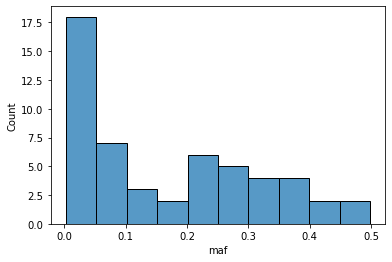

In [10]:
import seaborn as sns
sns.histplot(data=V2, x="maf", bins=10)

In [11]:
V2.sort_values("maf", ascending=False).head(10)

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group
11312,22,43104206,G,T,0.937113,[PrC],True,0.49836,96.345,dELS,6543,dELS_206
10772,20,44436388,A,C,0.903734,[IBD],True,0.48420,20.148,non_coding_transcript_exon_variant,34986,non_coding_transcript_exon_variant_45
6239,11,2835964,A,C,0.997374,"[HbA1c, T2D_BMI]",True,0.41567,30.963,dELS_flank,49763,dELS_flank_23
3550,6,12903725,A,G,1.000000,"[CAD, Migraine_Self, PP, SBP]",True,0.40512,109.600,non_coding_transcript_exon_variant,53565,non_coding_transcript_exon_variant_55
1520,2,127135234,C,T,0.986423,[Alzheimer_LTFH],True,0.39160,56.785,dELS,27945,dELS_169
1587,2,162254026,A,G,0.925581,[Hypothyroidism],True,0.39111,44.895,intergenic_variant,10569,intergenic_variant_52
9801,18,63178651,T,C,0.999994,"[ALT, Alb, BW, GGT, IGF1, SHBG, T2D_BMI, TG, W...",True,0.37644,17.322,dELS,16781,dELS_129
10815,20,48723580,A,G,0.969174,[CRC],True,0.36473,133.290,dELS,30895,dELS_190
2686,4,40290296,A,G,0.998094,[AID_Combined],True,0.33542,42.626,dELS,45036,dELS_234
1268,2,43845437,G,T,0.979776,[Cholelithiasis],True,0.32344,77.719,intron_variant,6465,intron_variant_101


In [37]:
V2

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group
61,1,9295877,G,T,0.993319,[DVT],True,0.265060,46.3070,dELS,1348,dELS_3
417,1,87761437,T,G,0.958607,[PrC],True,0.307070,50.8050,intron_variant,429768,intron_variant_6
561,1,151829204,G,A,0.999513,[DVT],True,0.146860,56.4930,dELS,2597,dELS_18
682,1,170224684,G,C,1.000000,[AFib],True,0.074523,43.6230,intron_variant,78724,intron_variant_10
955,1,239941553,G,A,0.991318,[AFib],True,0.003135,6.1231,DNase-H3K4me3,72794,DNase-H3K4me3_0
1160,2,19742712,G,A,0.977064,[CAD],True,0.068174,63.2340,intergenic_variant,158928,intergenic_variant_48
1268,2,43845437,G,T,0.979776,[Cholelithiasis],True,0.323440,77.7190,intron_variant,6465,intron_variant_101
1358,2,66523432,G,T,0.999552,[Insomnia],True,0.057248,24.7770,dELS_flank,82753,dELS_flank_91
1443,2,105749599,T,C,0.997764,[Alzheimer_LTFH],True,0.004319,11.2260,dELS,3867,dELS_162
1520,2,127135234,C,T,0.986423,[Alzheimer_LTFH],True,0.391600,56.7850,dELS,27945,dELS_169


In [36]:
pd.Series(np.concatenate(V2["trait"].values)).value_counts().reset_index().values

array([['DVT', 14],
       ['CAD', 6],
       ['PrC', 5],
       ['AFib', 4],
       ['T2D_BMI', 4],
       ['T2D', 4],
       ['Asthma', 4],
       ['Eosino', 4],
       ['PP', 3],
       ['HbA1c', 3],
       ['DBP', 3],
       ['TG', 3],
       ['LDLC', 3],
       ['ALT', 3],
       ['Hypothyroidism', 3],
       ['Alzheimer_LTFH', 3],
       ['TP', 2],
       ['WBC', 2],
       ['SHBG', 2],
       ['GGT', 2],
       ['BW', 2],
       ['Alb', 2],
       ['Insomnia', 2],
       ['Cholelithiasis', 2],
       ['AID_Combined', 2],
       ['AG', 2],
       ['TC', 2],
       ['LipoA', 2],
       ['Neutro', 2],
       ['CRC', 1],
       ['Fibroblastic_Disorders', 1],
       ['Age_at_Menopause', 1],
       ['Mono', 1],
       ['IBD', 1],
       ['BrC', 1],
       ['WHRadjBMI', 1],
       ['IGF1', 1],
       ['CRP', 1],
       ['AST', 1],
       ['eGFRcys', 1],
       ['SBP', 1],
       ['LOY', 1],
       ['HDLC', 1],
       ['ApoA', 1],
       ['eBMD', 1],
       ['UA', 1],
       ['Migraine_

In [52]:
V2[V2.trait.apply(lambda x: "Alzheimer_LTFH" in x)]

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group
1443,2,105749599,T,C,0.997764,[Alzheimer_LTFH],True,0.004319,11.226,dELS,3867,dELS_162
1520,2,127135234,C,T,0.986423,[Alzheimer_LTFH],True,0.391600,56.785,dELS,27945,dELS_169
3682,6,40974457,G,A,0.985050,[Alzheimer_LTFH],True,0.003012,10.619,intergenic_variant,60677,intergenic_variant_74


In [ ]:
import yaml


with open("../../results/dataset/complex_traits_matched_9/phenotypes.yaml") as f:
    disease = yaml.safe_load(f)